In [1]:
import os

import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling1D, Conv1D, Flatten, AveragePooling1D
from tensorflow.keras import regularizers

import raw_data_loader as data_loader

import model_runner

In [2]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
edfs_path = "../../../dataverse_files"
save_path = '../../../Results/CNN'

In [4]:
signal_segment_len = 5.0
data_split_ratio = 0.2
seed=1337

learning_rate = 0.001
epochs_n = 150
patience = 15
batch_size = 32
validation_split = 0.2

input_shape=None

### Loading data from edf files, segmenting and splitting to train and test datasets

In [5]:
X_train, X_test, y_train, y_test = data_loader.load_and_split_data(edfs_path, signal_segment_len, data_split_ratio, seed)

Not setting metadata
5771 matching events found
No baseline correction applied
0 bad epochs dropped

Epochs number per patient:  [185, 182, 182, 185, 189, 186, 182, 182, 181, 223, 183, 180, 193, 173, 169, 229, 192, 241, 178, 148, 269, 182, 237, 170, 272, 217, 227, 434]

negative:  3165
positive:  2606

X_train shape: (4616, 1250, 19)
X_test shape: (1155, 1250, 19)

input shape: (1250, 19)


In [6]:
input_shape = data_loader.input_shape
input_shape

(1250, 19)

## Models

### CNN

In [7]:

def build_model_LeNet5(input_shape, opt):    
    model = Sequential()

    
    
    model.add(Conv1D(20, 5, 5, input_shape=input_shape, activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Conv1D(50, 5, 5,  activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Flatten())

    model.add(Dense(84, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'LeNet5'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

batch size: 32
learning rate: 0.001
epochs: 150
Model: "LeNet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 250, 20)           1920      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 125, 20)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 50)            5050      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 50)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense (Dens

116/116 [==============================] - 1s 6ms/step - loss: 1.7889e-05 - accuracy: 1.0000 - val_loss: 1.8891 - val_accuracy: 0.9675
Epoch 46: early stopping


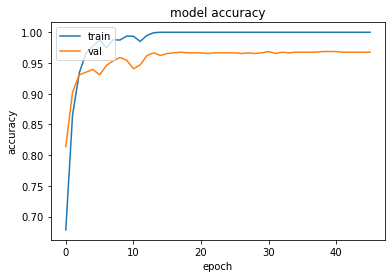

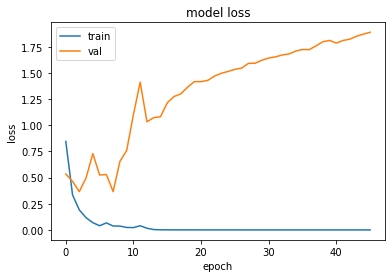

Test Accuracy: 0.9696969696969697
F1 score: 0.9721559268098648


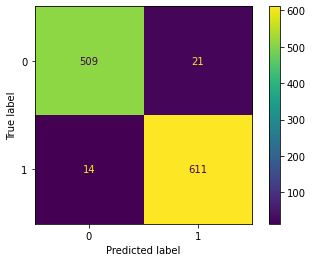

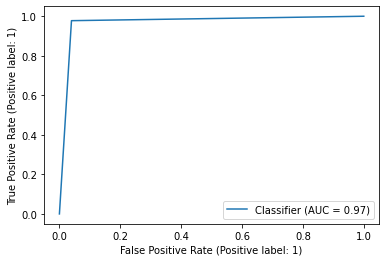

In [8]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_LeNet5, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

In [11]:

def build_model_LeNet5V2(input_shape, opt):    
    model = Sequential()

    
    
    model.add(Conv1D(6, 5, 1, input_shape=input_shape, activation='relu'))
    model.add(AveragePooling1D())

    model.add(Conv1D(16, 5, 1,  activation='relu'))
    model.add(AveragePooling1D())

    model.add(Conv1D(120, 5, 1,  activation='relu'))

    
    model.add(Flatten())

    model.add(Dense(84, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'LeNet5'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

batch size: 32
learning rate: 0.001
epochs: 150
Model: "LeNet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1246, 6)           576       
                                                                 
 average_pooling1d (AverageP  (None, 623, 6)           0         
 ooling1D)                                                       
                                                                 
 conv1d_3 (Conv1D)           (None, 619, 16)           496       
                                                                 
 average_pooling1d_1 (Averag  (None, 309, 16)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_4 (Conv1D)           (None, 305, 120)          9720      
                                                                 
 flatten_1 (

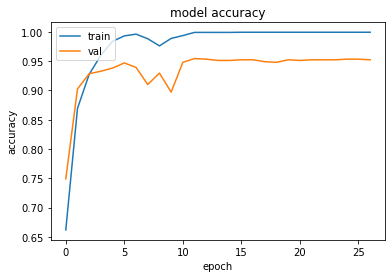

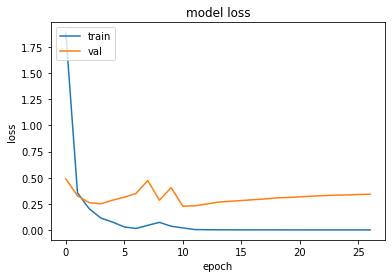

Test Accuracy: 0.9515151515151515
F1 score: 0.954983922829582


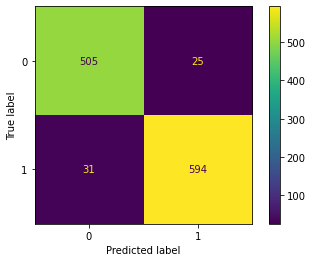

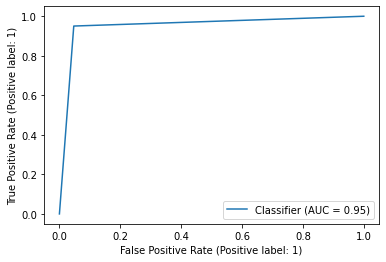

In [13]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_LeNet5V2, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

In [15]:
(31+25)/1155

0.048484848484848485